# Bookings cancellation prediction

<img align='left' style="width:100%" src='https://www.ezeeabsolute.com/blog/wp-content/uploads/2017/10/E_payment.jpg'>

Tourism and travel related industries, like Hotels, aim to optimize their room bookings and revenue. Hoteliers understand, however, that alongside these bookings is an uncertainty in regards to guest cancellations and no-shows. Regardless of  the reason behind guest no-shows and cancellations, these occurences largely impact revenue in a number of ways.

As such, our work seeks to employ various classification algorithms to develop predictive models which classify hotel bookings to determine whether or not they will cancel or no-show. These models could help hoteliers keep their businesses optimally booked, avert financial risk, and promote increased revenues. 



# Data

The data used in this notebook comes from an open hotel booking demand dataset collected by [Antonio, Almeida and Nunes, 2018](https://www.sciencedirect.com/science/article/pii/S2352340918315191) and downloaded from [R for Data Science online learning community](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/hotels.csv).

The dataset is a combination of two datasets with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. Its structure is formed with 32 variables describing the 40,060 observations of *resort hotel* and 79,330 observations of *city hotel*. Each observation represents a hotel booking. 

The dataset stores bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is real hotel data, the authors deleted all data elements pertaining hotel or costumer identification. 

## Variable Description

Below are listed the features with a short description:

|Variable                       |Type      |Description |
|:------------------------------|:---------|:-----------|
|ADR                            |Numeric   | Average Daily Rate, orthe average price of a hotel room over a given period.  |
|Adults                         |Integer   | Number of adults|
|Agent                          |Categorical| ID of the travel agency that made the booking|
|ArrivalDateDayOfMonth             |Integer    | Day of the month of the arrival date|
|ArrivalDateMonth             |Categorical |Month of arrival date with 12 categories: “January” to “December”|
|ArrivalDateWeekNumber       |Integer    | Week number of the arrival date|
|ArrivalDateYear             |Integer    | Year of arrival date|
|AssignedRoomType       |Categorical    |Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons |
|Babies           |Integer    |  Number of babies|
|BookingChanges                         |Integer    | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|Children                       |Integer    |Number of children|
|Company                         |Categorical    |ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of des- ignation for anonymity reasons |
|Country                           |Categorical |Country of origin. Categories are repre- sented in the ISO 3155–3:2013 format |
|CustomerType                        |Categorical |Type of booking, assuming one of four categories:<br>Contract - when the booking has an allotment or other type of contract associated to it;<br>Group – when the booking is associated to a group;<br>Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;<br>Transient-party – when the booking is transient, but is associated to at least other transient booking |
|DaysInWaitingList              |Integer | Number of days the booking was in the waiting list before it was confirmed to the customer |
|DepositType           |Categorical |ndication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:<br>No Deposit – no deposit was made;<br>Non Refund – a deposit was made in the value of the total stay cost;<br>Refundable – a deposit was made with a value under the total cost of stay. |
|DistributionChannel              |Categorical    | VBooking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”|
|Hotel  | Categorical  | Type of hotel (Resort Hotel or City Hotel |
|IsCanceled         |Categorical    | Value indicating if the booking was canceled (1) or not (0)|
|IsRepeatedGuest |IsRepeatedGuest    | Value indicating if the booking name was from a repeated guest (1) or not (0) |
|LeadTime             |Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
|MarketSegment             |Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” |
|Meal                |Categorical    | Type of meal booked. Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package;<br>BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) |
|PreviousBookingsNotCanceled                   |Integer | Number of previous bookings not cancelled by the customer prior to the current booking|
|PreviousCancellations                          |Integer | Number of previous bookings that were cancelled by the customer prior to the current booking |
|RequiredCardParkingSpaces                        |Integer | Number of car parking spaces required by the customer|
|ReservationStatus           |Categorical    |  Reservation last status, assuming one of three categories:<br>Canceled – booking was canceled by the customer;<br>Check-Out – customer has checked in but already departed;<br>No-Show – customer did not check-in and did inform the hotel of the reason why |
|ReservationStatusDate                  |Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel|
|ReservedRoomType                            |Categorical    | Code of room type reserved. Code is presented instead of designation for anonymity reasons |
|StaysInWeekendNights    |Integer    |Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
|StaysInWeekNights      |Integer    | NNumber of week nights (Monday to Fri- day) the guest stayed or booked to stay at the hotel|
|TotalOfSpecialRequests             |Integer | Number of special requests made by the customer (e.g. twin bed or high floor)|

# Libraries

In [0]:

# linear algebra
import numpy as np 

# data processing
import pandas as pd 
#pd.set_option('display.max_columns', None) 
import sklearn as sk

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.simplefilter('ignore')


# Data Prepocessing

In [0]:
rawData = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv")
print("Shape:", rawData.shape)
rawData.info()

Shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel  

**The dataset has 119390 examples and 31 features + the target variable (is_canceled)**. 4 of the features are floats, 16 are integers and 12 are objects. On top of that we can already detect some features, that contain missing values, like the ‘company’ feature.

In [0]:
rawData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


From the table above, we can note a few things. First of all, that **we need to convert a lot of features into numeric** ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the **features have widely different ranges**, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

## Data Cleaning

### Missing Values

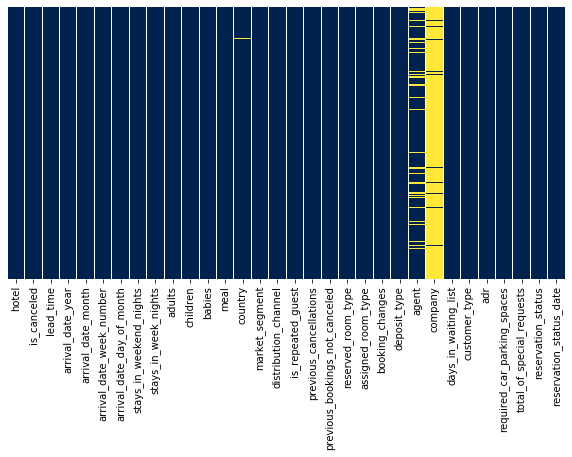

In [0]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.heatmap(rawData.isnull(),yticklabels=False,cbar=False,cmap='cividis')

The plot above shows graphically in yellow color how much data is missing in each feature. **Let’s take a more detailed look at what data is actually missing**:

In [0]:
null = rawData.isnull().sum().sort_values(ascending=True)
percentNull = rawData.isnull().sum()/rawData.isnull().count()*100
percentNull = (round(percentNull, 2)).sort_values(ascending=True)
missingData = pd.concat([null, percentNull], axis=1, keys=['Count Null', '% Percentage'])
missingData.sort_values(by=['Count Null'], ascending=False).head()

,Count Null,% Percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
adr,0,0.00


The 'children' feature has only 4 missing values, which can easily be filled . It will be much more tricky, however, to deal with the ‘Country’ feature which has 488 missing values. The ‘agent’ and 'company' features should be dropped from the dataset, since  13% and 94% of it are missing.

#### Company & Agent:

In [0]:
clnData = rawData.drop(['company', 'agent'], axis=1)

#### Country 

In [0]:
print(rawData['country'].describe())

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object


The most common value for country is 'PRT' which stands for Portugal with 48,590 out of 118,902 records. Looking at the bar graph above, PRT has the greatest frequency by far, so we think it is appropriate to fill the missing records with this value.   

In [0]:
clnData['country'] = clnData['country'].fillna('PRT')
clnData["country"].isnull().sum()

0

#### Children: 

Since the 'children' feature has only 4 missing values, we will just fill these with the most common one.

In [0]:
rawData['children'].mode()

0    0.0
dtype: float64

In [0]:
clnData['children'] = clnData['children'].fillna(0.0)
clnData["children"].isnull().sum()

0

Now, we have only non-null values in the dataset

### Duplicate Values

Now, let's see if the dataset has identical records.

In [0]:
duplicateRowsDF = clnData[clnData.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
duplicateRowsDF.head(30)

All Duplicate Rows based on all columns are :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,A,1,No Deposit,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,E,0,No Deposit,0,Transient,137.00,0,1,Check-Out,2015-07-07
132,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,D,0,No Deposit,0,Transient,97.00,0,0,Canceled,2015-07-01
198,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,A,0,No Deposit,0,Transient,109.80,0,3,Check-Out,2015-07-08


Above, we see a couple of examples of rows that are identical in all of their features values. If we look at the index, we can see that duplicated rows are literally contigous or very close to the first occurrence. The reason of this issue is unkown. 

In [0]:
duplicateRowsDF = clnData[clnData.duplicated()] 
print("Quantity of duplicated Rows except first occurrence based on all columns are :")
len(duplicateRowsDF)

Quantity of duplicated Rows except first occurrence based on all columns are :


32039

We have more than 32,000 records that are duplicated. Including them could essentially cause the models to overfit this subset of points, so we decided to drop them from our dataset. 

In [0]:
clnData = clnData.drop_duplicates()

### Noise & Outliers

In [0]:
descriptive = clnData.describe()
descriptive.transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,87351.0,0.274983,0.446508,0.00,0.0,0.0,1.0,1.0
lead_time,87351.0,79.915090,86.058284,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87351.0,2016.210290,0.686097,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87351.0,26.840322,13.673041,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87351.0,15.815629,8.834814,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87351.0,1.005541,1.032019,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87351.0,2.625854,2.053793,0.00,1.0,2.0,4.0,50.0
adults,87351.0,1.875983,0.626504,0.00,2.0,2.0,2.0,55.0
children,87351.0,0.138705,0.455978,0.00,0.0,0.0,0.0,10.0
babies,87351.0,0.010807,0.113527,0.00,0.0,0.0,0.0,10.0


Above we can see that **27% out of the dataset canceled the booking**. We can also see that it is very propable that we need to deal with outliers in various features like 'lead_time', 'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations', 'adr', etc. Also, we can see that 'adr'(Average Daily Rate) has a negative value that we'll deal in the next section. 

#### Lead time, week and weekend nights

More than 300 days of lead time:  2286
More than 5 days in weekend nights:  220
More than 10 days on week nights:  340


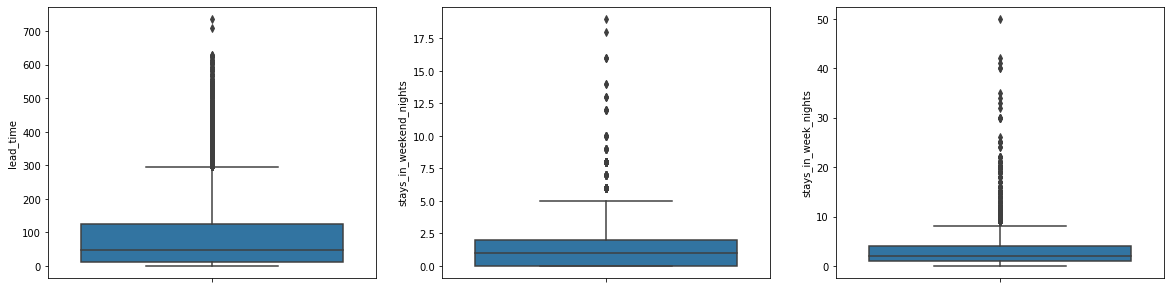

In [0]:
f, axes = plt.subplots(1, 3,figsize=(20,5))
sns.boxplot(y=clnData['lead_time'], ax=axes[0])
sns.boxplot(y=clnData['stays_in_weekend_nights'], ax=axes[1])
sns.boxplot(y=clnData['stays_in_week_nights'], ax=axes[2])

print('More than 300 days of lead time: ' , len(clnData[clnData.lead_time>300]))
print('More than 5 days in weekend nights: ' , len(clnData[clnData.stays_in_weekend_nights>5]))
print('More than 10 days on week nights: ' , len(clnData[clnData.stays_in_week_nights>10]))

We see that more than 300 days on lead_time is considered an outlier, but we think this level of noise is acceptable, so we decided to leave them as they are. This also applies for week and weekend nights.

#### Adults, children and babies 

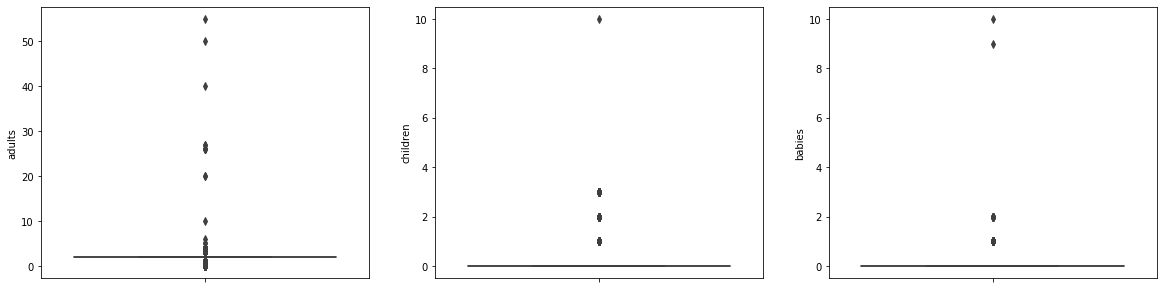

In [0]:
f, axes = plt.subplots(1, 3,figsize=(20,5))
sns.boxplot(y=clnData['adults'], ax=axes[0])
sns.boxplot(y=clnData['children'], ax=axes[1])
sns.boxplot(y=clnData['babies'], ax=axes[2])

In [0]:
clnData = clnData[clnData['adults']<=6]
clnData = clnData[clnData['children']<=4]
clnData = clnData[clnData['babies']<=4]

We decided to top the number of adults up to 6 (2 adults + 4 adults or teens). We see that there's a booking with 10 children that may be due to an error, so we decided to top this feature up to 4 children. We applied this also to the 'babies' feature.  

#### Previous cancellations, previous booking not canceled, booking changes and days in waiting list

More than 1 previous cancellations:  1685
More than 1 previous bookings not canceled:  3545
More than 1 booking changes:  15895
More than 1 days in waiting list:  860


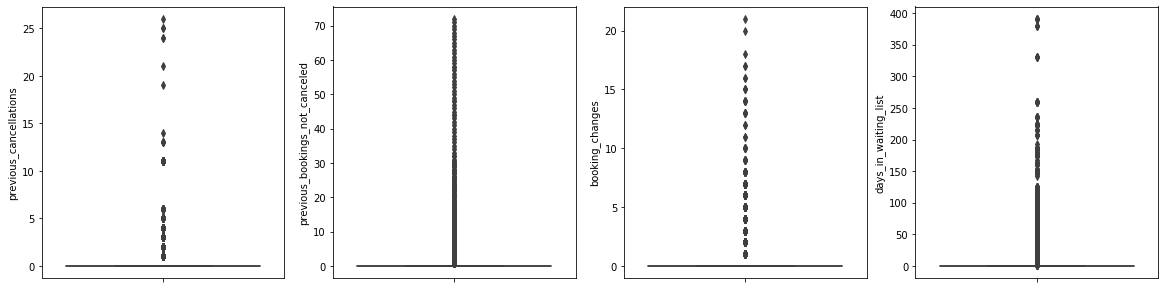

In [0]:
f, axes = plt.subplots(1, 4,figsize=(20,5))
sns.boxplot(y=clnData['previous_cancellations'], ax=axes[0])
sns.boxplot(y=clnData['previous_bookings_not_canceled'], ax=axes[1])
sns.boxplot(y=clnData['booking_changes'], ax=axes[2])
sns.boxplot(y=clnData['days_in_waiting_list'], ax=axes[3])

print('More than 1 previous cancellations: ' , len(clnData[clnData.previous_cancellations>0]))
print('More than 1 previous bookings not canceled: ' , len(clnData[clnData.previous_bookings_not_canceled>0]))
print('More than 1 booking changes: ' , len(clnData[clnData.booking_changes>0]))
print('More than 1 days in waiting list: ' , len(clnData[clnData.days_in_waiting_list>0]))

We decided to leave the outliers in this features. Removing them would be equal to drop the whole features.  

#### Average Daily Rate 

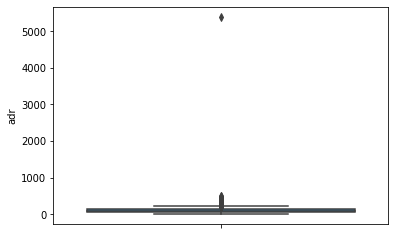

In [0]:
sns.boxplot(y=clnData['adr'])

There is a clearly anomaly in 'adr' so we will delete it and see the rest of the plot more clearly. 

Daily rates above 250:  1216


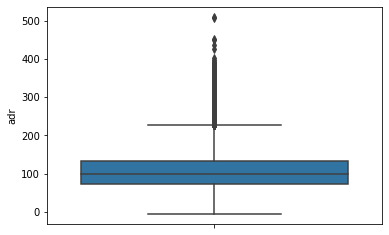

In [0]:
clnData = clnData[clnData.adr<1000]
sns.boxplot(y=clnData['adr'])
print('Daily rates above 250: ' , len(clnData[clnData.adr>250]))

We are going to leave the outliers because they appear feasible due to special requests. 

### Errors / Inconsistent Values

In [0]:
print('There are ',len(clnData[(clnData.adults == 0) & (clnData.children == 0)]), ' bookings with no guests')
clnData = clnData.drop(clnData[(clnData.adults == 0) & (clnData.children == 0)].index)

There are  166  bookings with no guests


We deleted this bookings with no guests. 

As stated before, there were a booking with a negative value in 'adr' that we need to get rid off. 

In [0]:
clnData[clnData.adr<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [0]:
clnData = clnData[clnData.adr>=0]
clnData.shape

(87167, 30)

After all the data preprocessing, our datased ended with 87,167 records. 

# Data Exploration

## Arrived vs Canceled bookings

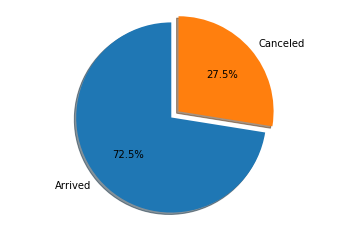

In [0]:
labels = 'Arrived', 'Canceled'
sizes = [len(clnData[clnData.is_canceled==0]),len(clnData[clnData.is_canceled==1]),  ]
explode = (0, 0.1,) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

As said before, 27.5% of the bookings were canceled. We can say that this class labe is slightly imabalanced which is not a concern. We can treat this problem like a normal classification predictive modeling problem.  

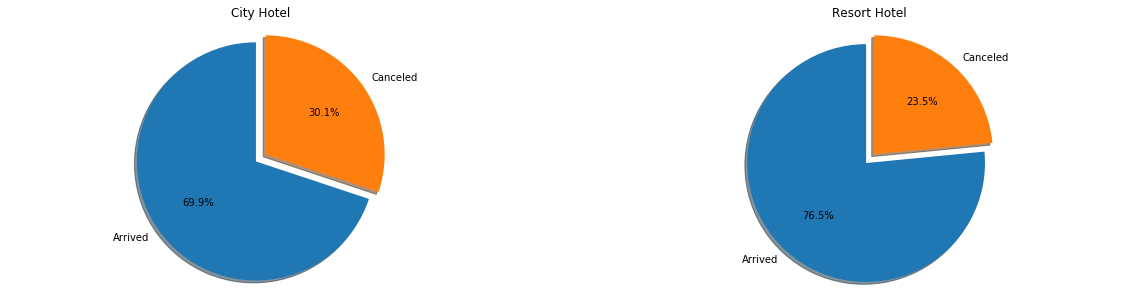

In [0]:
cityHotel = clnData[clnData['hotel']=='City Hotel']
sizesCity = [len(cityHotel[cityHotel.is_canceled==0]),len(cityHotel[cityHotel.is_canceled==1]),  ]

resortHotel = clnData[clnData['hotel']=='Resort Hotel']
sizesResort = [len(resortHotel[resortHotel.is_canceled==0]),len(resortHotel[resortHotel.is_canceled==1]),  ]

explode = (0, 0.1,) 
f, axes = plt.subplots(1, 2,figsize=(20,5))

axes[0].pie(sizesCity, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[0].axis('equal')  

axes[1].pie(sizesResort, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axes[1].axis('equal') 

axes[0].set_title('City Hotel')
axes[1].set_title('Resort Hotel')
plt.show()

The proportion between canceled bookings and arrived booking only differ by 7% in both hotels.

## Bookings by month  and lead time

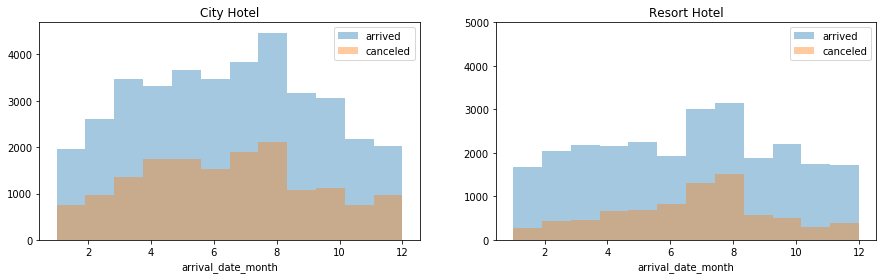

In [0]:
arrived = 'arrived'
canceled = 'canceled'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 4))
plt.ylim(0, 5000)
cityHotel = clnData[clnData['hotel']=='City Hotel']
resortHotel = clnData[clnData['hotel']=='Resort Hotel']
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
cityHotel.arrival_date_month = cityHotel.arrival_date_month.map(d)
resortHotel.arrival_date_month = resortHotel.arrival_date_month.map(d)
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==0].arrival_date_month, bins=12, label = arrived, ax = axes[0], kde =False)
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==1].arrival_date_month, bins=12, label = canceled, ax = axes[0], kde =False)
ax.legend()
ax.set_title('City Hotel')
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==0].arrival_date_month, bins=12, label = arrived, ax = axes[1], kde =False)
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==1].arrival_date_month, bins=12, label = canceled, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('Resort Hotel')

We can see that City Hotel has a higher probability of getting a booking cancelled between April and August while Resort Hotel has a higher probabilty of getting a booking cancel only from July to August which also coincides with their top months of bookings. 

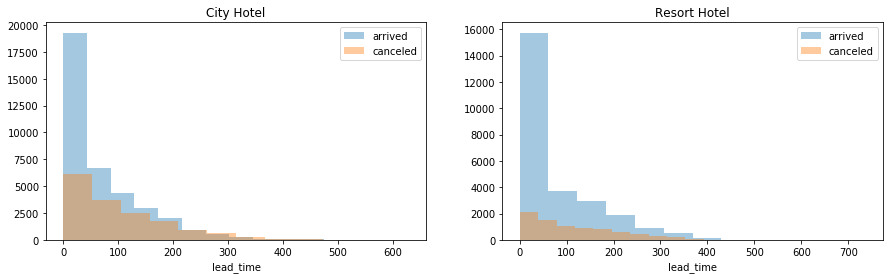

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 4))
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==0].lead_time, bins=12, label = arrived, ax = axes[0], kde =False)
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==1].lead_time, bins=12, label = canceled, ax = axes[0], kde =False)
ax.legend()
ax.set_title('City Hotel')
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==0].lead_time, bins=12, label = arrived, ax = axes[1], kde =False)
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==1].lead_time, bins=12, label = canceled, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('Resort Hotel')

Also the probability of booking and canceling decrease exponentially after 50 days of lead time prior the date of arrival.  

## Bookings by ADR 

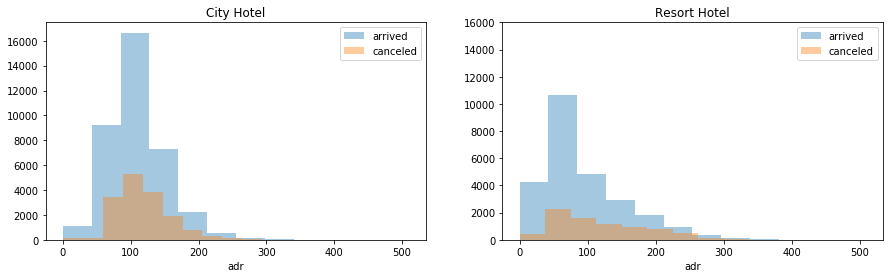

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 4))
plt.ylim(0, 16000)
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==0].adr, bins=12, label = arrived, ax = axes[0], kde =False)
ax = sns.distplot(cityHotel[cityHotel['is_canceled']==1].adr, bins=12, label = canceled, ax = axes[0], kde =False)
ax.legend()
ax.set_title('City Hotel')
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==0].adr, bins=12, label = arrived, ax = axes[1], kde =False)
ax = sns.distplot(resortHotel[resortHotel['is_canceled']==1].adr, bins=12, label = canceled, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('Resort Hotel')

We can see that in both plots, there are minimun cancelations for low adr (0-50), and that the peak rate ranges from (50-150) 

## Deposit type

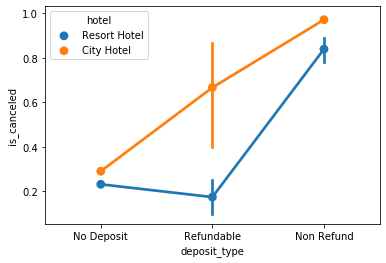

In [0]:
ax= sns.pointplot(x="deposit_type", y="is_canceled", hue='hotel' ,data=clnData)

Deposit type seems to be correlated with booking cancelations on both hotels. Refundable deposit has a higher chance of being canceled on City hotels bookings. 

# Feature Engineering

In [0]:
clnData
fe_clnData = clnData
fe_clnData.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

Looking at the dataset above, we have much work to do in order to eliminate categorical data.

## Drop Features

 Firstly, we will drop reservation_status as it corrseponds directly with our class label isCancelled. Next, we will remove the trivial reservation_status_date, and choose to evaluate the hotel information irrespective of country by removing the country feature. The market_segment feature corresponds directly with the distribution_channel feature. 

In [0]:
fe_clnData = fe_clnData.drop(['reservation_status', 'reservation_status_date','country','arrival_date_week_number','market_segment'], axis=1)
fe_clnData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,0,C,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,0,C,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,A,C,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,A,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,A,A,0,No Deposit,0,Transient,98.0,0,1


##Categorical Features

In [0]:
print(fe_clnData['distribution_channel'].value_counts())
print(fe_clnData['customer_type'].value_counts())
print(fe_clnData['meal'].value_counts())


TA/TO        68997
Direct       12935
Corporate     5049
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64
Transient          71827
Transient-Party    11678
Contract            3134
Group                528
Name: customer_type, dtype: int64
BB           67854
SC            9390
HB            9074
Undefined      490
FB             359
Name: meal, dtype: int64


Examining the values and frequencies for the distribution_channel , customer_type , meal , and hotel features above, we can take some simple steps to prepare this data for our algorithms. 

The distribution_channel feature has 5 Undefined values which we can simply translate to TA/TO, the most frequent option. Additionally, GDS stands for Global Distribution System, and is a similar service to the Travel Agency/ Tour Operator option. As such, we replace these values with TA/TO to limit our features in preparation for one-hot-encoding.

The meal feature has 5 unique options which reflect between 0 and 3 meals being served to guests per day, we replaces these values with corresponding numerical ones.

The customer_type feature has 4 unique values which can be combined into two categories, Contracts and Groups, and Transient & Transient-Parties. The dataset description of these values encouraged such a transformation.

Finally, the hotel feature can simply be Label encoded as it only has two unique values.

In [0]:
categorical_to_numeric = {"hotel":     {"Resort Hotel": 0, "City Hotel": 1},
                          "distribution_channel": {"Undefined" : "TA/TO", "GDS" :"TA/TO" },
                          "meal" : {"Undefined" : 0, "SC" : 0, "BB" : 1, "HB" : 2, "FB" : 3 },
                          "customer_type" : {"Contract": 0 , "Group": 0 , "Transient": 1, "Transient-Party": 1}}

fe_clnData.replace(categorical_to_numeric, inplace=True)
fe_clnData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,2015,July,1,0,0,2,0.0,...,0,C,C,3,No Deposit,0,1,0.0,0,0
1,0,0,737,2015,July,1,0,0,2,0.0,...,0,C,C,4,No Deposit,0,1,0.0,0,0
2,0,0,7,2015,July,1,0,1,1,0.0,...,0,A,C,0,No Deposit,0,1,75.0,0,0
3,0,0,13,2015,July,1,0,1,1,0.0,...,0,A,A,0,No Deposit,0,1,75.0,0,0
4,0,0,14,2015,July,1,0,2,2,0.0,...,0,A,A,0,No Deposit,0,1,98.0,0,1


The features deposit_type and distribution_channel each have three values, so we employ One-Hot-Encoding to represent these values within our feature set.

In [0]:
fe_clnData = pd.get_dummies(fe_clnData, columns=["distribution_channel", "deposit_type"])
fe_clnData.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_TA/TO,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,342,2015,July,1,0,0,2,0.0,...,1,0.0,0,0,0,1,0,1,0,0
1,0,0,737,2015,July,1,0,0,2,0.0,...,1,0.0,0,0,0,1,0,1,0,0
2,0,0,7,2015,July,1,0,1,1,0.0,...,1,75.0,0,0,0,1,0,1,0,0
3,0,0,13,2015,July,1,0,1,1,0.0,...,1,75.0,0,0,1,0,0,1,0,0
4,0,0,14,2015,July,1,0,2,2,0.0,...,1,98.0,0,1,0,0,1,1,0,0


## Feature Creation

The reserved_room_type and assigned_room_type features provide little value to our dataset unless combined to determine whether the room provided to a guest was as expected. As such, we drop these two features and replace them with a numeric column relating if the room was correctly provided.

In [0]:
is_room_correct = []

for ind in fe_clnData.index: 
     if( fe_clnData['reserved_room_type'][ind] != fe_clnData['assigned_room_type'][ind]):
       is_room_correct.append(0)
     else:
       is_room_correct.append(1)

fe_clnData = fe_clnData.drop(['reserved_room_type', 'assigned_room_type'], axis=1)
fe_clnData['is_room_correct'] = is_room_correct

For some reason, the children feature was entered as a float with values. We applied a lambda function on this column to cast it as an integer.

In [0]:
fe_clnData['children'] = fe_clnData['children'].apply(lambda x: int(float(x)))

The features corresponding with the booking dates are poorly suited for our ML algorithms. For one, the month category is categorical and should be translated to numeric. After making this change, we can combine the year, month, and day of month features from our dataset into a datetime object. 

After creating a datetime object, we can then convert these records' values into a weekday feature - reflecting monday (0) to sunday (6), and a day of year feature - from 1 to 365. 

These features are further primed for our ml algorithms by using sin and cosine transformations to reflect their cyclical nature. This transformation makes it so that day 365 and day 1 are 1 day apart, and weekday 0 (monday) and weekday 6 (sunday) are also 1 day apart. 

In [0]:
encode_dates = {"arrival_date_month":     {"January": 1, "February": 2,
                                           "March": 3, "April": 4,
                                           "May": 5, "June": 6,
                                           "July" : 7, "August": 8,
                                           "September": 9, "October": 10,
                                           "November": 11, "December": 12 }}

fe_clnData.replace(encode_dates, inplace=True)

df = pd.DataFrame({'year': fe_clnData['arrival_date_year'],

                   'month': fe_clnData['arrival_date_month'],

                   'day': fe_clnData['arrival_date_day_of_month']})
dates = pd.to_datetime(df)

weekdays = dates.dt.weekday
day_of_year = dates.dt.dayofyear


fe_clnData['weekday_sin'] = np.sin(2 * np.pi * weekdays/6.0)
fe_clnData['weekday_cos'] = np.cos(2 * np.pi * weekdays/6.0)
fe_clnData['day_of_year_sin'] = np.sin(2 * np.pi * day_of_year/365.0)
fe_clnData['day_of_year_cos'] = np.cos(2 * np.pi * day_of_year/365.0)

fe_clnData = fe_clnData.drop(['arrival_date_year', 'arrival_date_month','arrival_date_day_of_month'], axis=1)


In [0]:
fe_clnData.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
booking_changes                     int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
distribution_channel_Corporate      uint8
distribution_channel_Direct         uint8
distribution_channel_TA/TO          uint8
deposit_type_No Deposit             uint8
deposit_type_Non Refund             uint8
deposit_type_Refundable           

# Principle Component Analysis


Now that the feature engineering is complete, we still need to standardize and reduce the dimensionality of the data before running it through our algorithms. For this, we first seperate the label from the features to standaridze only the features. Then using an 80%-20% split, we seperate the data into training and test data. 

In [0]:
pca_data_labels = fe_clnData['is_canceled']

pca_data_features = fe_clnData.drop(['is_canceled'],axis=1)

print(pca_data_labels.shape)
pca_data_features.shape

(87167,)


(87167, 28)

In [0]:
from sklearn.preprocessing import StandardScaler

stdze = StandardScaler()
pca_data_features_std = stdze.fit_transform(pca_data_features)

In [0]:
from sklearn.model_selection import train_test_split

pca_features_train, pca_features_test, pca_label_train, pca_label_test = train_test_split(pca_data_features_std, pca_data_labels, test_size=0.20)

print("features_train=",pca_features_train.shape, " label_train=", pca_label_train.shape)
print("features_test=",pca_features_test.shape, " label_test=", pca_label_test.shape)

features_train= (69733, 28)  label_train= (69733,)
features_test= (17434, 28)  label_test= (17434,)


From the split, we can see that the training set contains 69733 records and the test set 17434. We now perform a PCA on the training set and use that to determine the number of principle components needed for 95% variance to be retained. The dataset will be reduced to that number of columns for running on our classfier algorithms.

In [0]:
from sklearn.decomposition import PCA

# Fit PCA to the training set. Use fit_transform to transform the data to the PCA space.
pca = PCA()
pca_data = pca.fit_transform(pca_features_train)

var_exp = pca.explained_variance_ratio_
print("cumulative variance:", np.cumsum(var_exp)) #keep 22 features with variance below 95%

features_train_pca_1 = pca_data[:, :22]

features_test_pca_1 = pca.transform(pca_features_test)[:,:22]

print(features_train_pca_1.shape, features_test_pca_1.shape)

cumulative variance: [0.10526775 0.18288143 0.25419899 0.31619057 0.37316728 0.41821198
 0.4623311  0.50194776 0.54074343 0.57856939 0.61568654 0.65073258
 0.68466096 0.7178724  0.74985495 0.78125335 0.811355   0.84100256
 0.86945657 0.89603547 0.91914597 0.94180431 0.96297018 0.98093997
 0.99203346 1.         1.         1.        ]
(69733, 22) (17434, 22)


# Data Analysis

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

DT_X = pca_features_train
DT_Y = pca_label_train

clf = DecisionTreeClassifier()
params = {"max_depth": [5,10,15,20],
          "min_samples_leaf": [5,10,15,20],
          "max_features" : [5,10,15]}


grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

grid_search.fit(DT_X, DT_Y)

print(grid_search.best_params_)

scores = cross_val_score(grid_search, DT_X, DT_Y, cv=5) 
print("Scores:", scores)                                            

print("Accuracy:", scores.mean()*100)

{'max_depth': 15, 'max_features': 15, 'min_samples_leaf': 20}
Scores: [0.77960998 0.78676418 0.78323534 0.78660548 0.78388068]
Accuracy: 78.4019131161071


## SVM

In [0]:
svm_data_labels = pca_label_train
svm_data_features = pca_features_train

print(svm_data_features.shape)
print(svm_data_labels.shape)

(69733, 28)
(69733,)


In [0]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

svm_scaler = sk.preprocessing.StandardScaler()
svc = SVC()

pipe = Pipeline(steps=[('scaler', svm_scaler), ('svc', svc)])

svm_score = cross_val_score(pipe, svm_data_features,svm_data_labels,cv=5)

print("Accuracy:", svm_score.mean()*100)

Accuracy: 79.15764620633921


In [0]:
import pickle #set this final_model to your final model
final_model = svm_score

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))


## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

KNN_X = pca_features_train
KNN_Y = pca_label_train


In [0]:
clf = KNeighborsClassifier(n_neighbors=5)
KNN_Y_pred = cross_val_predict(clf, KNN_X, KNN_Y, cv=5)

print(confusion_matrix(KNN_Y, KNN_Y_pred))
print(classification_report(KNN_Y, KNN_Y_pred))

[[44524  6093]
 [10178  8938]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85     50617
           1       0.59      0.47      0.52     19116

    accuracy                           0.77     69733
   macro avg       0.70      0.67      0.68     69733
weighted avg       0.75      0.77      0.76     69733



In [0]:
clf = KNeighborsClassifier()
params = {"n_neighbors": list(range(25,76,10))}


KNN_grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

KNN_grid_search.fit(KNN_X, KNN_Y)

print(KNN_grid_search.best_params_)

accuracy = cross_val_score(KNN_grid_search, KNN_X, KNN_Y, cv=5, scoring='accuracy')
print("Accuracy:",round(np.mean(accuracy)*100,3))

{'n_neighbors': 35}
Accuracy: 78.091


## NB

In [0]:
#Naive Bayes algorithm assumes strong independence between features.
#import GaussianNB so liklihood of continuous features is estimated using a Gaussian distribution. 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#set train and test data
YData = pca_label_train
XData = pca_features_train

#fit the data to the NB Classifier model
nbc = GaussianNB()
nbc = nbc.fit(XData, YData)

#use a 10 fold cross validation to determine accuracy of NB model
nbcscores = cross_val_score(nbc, XData, YData, cv=10)
print("scores: ", nbcscores)
print("Accuracy:", scores.mean()*100)

## Naive Bayes

In [0]:
#Naive Bayes algorithm assumes strong independence between features.

#import GaussianNB so liklihood of continuous features is estimated using a Gaussian distribution. 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

#set train and test data
YData = pca_label_train
XData = pca_features_train

#fit the data to the NB Classifier model
nbc = GaussianNB()
nbc = nbc.fit(XData, YData)

#use a 10 fold cross validation to determine accuracy of NB model
nbcscores = cross_val_score(nbc, XData, YData, cv=10)
print("scores: ", nbcscores)
print("Accuracy:", nbcscores.mean()*100)

scores:  [0.52150846 0.52753083 0.52968167 0.52767422 0.53449018 0.52961423
 0.54194751 0.52330417 0.5237344  0.53141136]
Accuracy: 52.908970337268926


## Ensemble

Random Forests Ensemble

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#set training and test sets
YData = pca_label_train
XData = pca_features_train

#use a Random Forest Classfier to tune hyperparameters for optimal fit 
rfc = RandomForestClassifier()
params = {'max_depth': [10,50,100], 'min_samples_leaf': [25,50,100], 'max_features':['sqrt','log2']}
rfc_grid = GridSearchCV(rfc, params)
rfc_grid.fit(XData, YData)

#use a 10 fold cross validation to determine accuracy of Random Forests model
rfc_cvs = cross_val_score(rfc_grid, XData, YData, cv=10)
print("Accuracy:", rfc_cvs.mean()*100)

Accuracy: 79.22791128340879


Boosting Ensemble

In [0]:
from sklearn.ensemble import AdaBoostClassifier

#use a Boosting Classfier to tune hyperparameters for optimal fit 
b = AdaBoostClassifier()
params = {'n_estimators': [*range(50,251,25)]}
b_grid = GridSearchCV(b, params)
b_grid.fit(XData, YData)

#use a 10 fold cross validation to determine accuracy of ADABoosting model
b_cvs = cross_val_score(b_grid, XData, YData, cv=10)
print("Accuracy:", b_cvs.mean()*100)

Accuracy: 78.45925432478276


## Neural Networks(NN)

For this NN we created a pipeline that includes scaling and the MLPClassifier.

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

YData = pca_label_train
XData = pca_features_train

mlp = MLPClassifier()
#scaler = StandardScaler()

#pipe = Pipeline(steps=[('scaler', scaler), ('mlp', mlp)])
#pipe = Pipeline(steps=[('mlp', mlp)])

Then we defined a hyper-parameter space to search.

In [0]:
param_grid = {'hidden_layer_sizes': [(11,),(22,),(11,11),(22,22)], 
              'activation':['logistic','tanh','relu'],
              'solver': ['adam'],
              'alpha':[0.01, 0.05]}

After that we can run the search:

In [0]:
gscv=GridSearchCV(mlp, param_grid, cv=5 )
gscv.fit(XData, YData)
print('Best parameters found:\n', gscv.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (22, 22), 'solver': 'adam'}


And finally see the results:

In [0]:
scores = cross_val_score(gscv, XData, YData, cv=5)
print("scores: ", scores)
print("Accuracy: ", scores.mean())

Didn't get to see the results due to computing time.

# Results and Conclusion 

In [0]:
import pandas as pd 
table = pd.DataFrame({"Model": ["Decision Tree",  "SVM", 'KNN', 'Naive Bayes', 'Random Forests Ensemble', 'Boosting ensemble'],
                     "Accuracy Scores": ["78.40", "79.15", "78.091", "52.90", "79.12", "78.45",
                                         ]})


table["Model"] = table["Model"].astype("category")
table["Accuracy Scores"] = table["Accuracy Scores"].astype("float32")

pd.pivot_table(table, index = ["Model"]).sort_values(by = 'Accuracy Scores', ascending=False)

,Accuracy Scores
Model,
SVM,79.150002
Random Forests Ensemble,79.120003
Boosting ensemble,78.449997
Decision Tree,78.400002
KNN,78.091003
Naive Bayes,52.900002


In conclusion, we chose SVM as the best model with which to evaluate our dataset. We made this decision because this model had the highest accuracy when evaluated with a cross validation. Additionally, SVM is very effective in high dimensional spaces.

To further evaluate the accuracy of this model, we will test it with our test set produced through Principal Component Analysis, and display a confusion matrix for further analysis.

In [0]:
pipe.fit(svm_data_features,svm_data_labels)
predictions = pipe.predict(pca_features_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(pca_label_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pca_label_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86     12561
           1       0.73      0.37      0.49      4873

    accuracy                           0.78     17434
   macro avg       0.76      0.66      0.68     17434
weighted avg       0.78      0.78      0.76     17434

[[11895   666]
 [ 3090  1783]]


From confusion Matrix we can conclude that we predicted  
**True positive: 11895**  
**True negative: 1783** 
**False positive: 666**
**False negative: 3090**

**Accuracy = (TP+TN)/total**  
**Accuracy = (11895+1783)/17434 ~ 78%**  
**Error Rate = (FP+FN)/total**  
**Error rate = (666+3090)/17434 ~21%**

Finally, we will optimize our model for future booking cancellation predictions by training it with our test data. Using the entire classified dataset in our highest performing model should serve to improve its predictive accuracy moving forward.
Given that this model has already been trained with 4 times the amount of data in the pca training set, we are not particularly concerned with the risk of overfitting our model to this additional test data.

A few other models came quite close, but we decided not to proceed with those for the reasons listed below:

a) Decision Trees provided a lower accuracy compared to the other models due to their simplicity and the variance in the data

b) KNN was less accurate that the other models due to the curse of dimensionality drastically affecting the algorithm

c) Naive Bayes fails to work on datasets with such high dimensionality as ours

d) If the ensemble methods' hyperparameter tuning are not optimal, there is a risk of overfitting or having a biased model.

e) Our Neural Net algorithm took an extremely long time (more than 4 hours) and still did not finish running. Due to this, we were unable to effectively evaluate this algorithm.